<a href="https://colab.research.google.com/github/pgyanelli98/alura-inmersion-datos/blob/main/Inmersion_Datos_Clase_1_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inmersión de Datos con Alura - Clase 01**

# **Desafíos de esta aula**


*   Promedio del área de todos los inmuebles en los barrios en el dataset. El top 10;
*   Consultar otros datos estadísticos, conteo, mediana, valores mínimo y máximo.


Para el desafío se utilizó la base de datos del aula: https://caelum-online-public.s3.amazonaws.com/alura-latam-inmersion-datos/alura_latam-inmersion_datos-arhivos_descarga/inmuebles_bogota.csv

In [1]:
import pandas as pd

In [21]:
# Carga de los datos dentro de la variable inmuebles
inmuebles = pd.read_csv('https://caelum-online-public.s3.amazonaws.com/alura-latam-inmersion-datos/alura_latam-inmersion_datos-arhivos_descarga/inmuebles_bogota.csv')

columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)

In [3]:
# Análisis rápido del DataFrame
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [44]:
# Promedio del área de todos los inmuebles en los barrios en el dataset.

lista_barrios = inmuebles[["Barrio", "Area"]]

info_area = lista_barrios.pivot_table(
    index=["Barrio"],
    values=["Area"],
    aggfunc="mean"
).sort_values("Area", ascending=False).head(10)

info_area


,Area
Barrio,
Modelia,4316.750000
Libertador,642.000000
Bosa Piamonte,400.000000
La Soledad,378.625000
Restrepo,336.500000
Santa Librada,328.000000
Las Ferias,320.000000
Santa Ana,309.375000
Veraguas,302.666667


<Axes: xlabel='Barrio'>

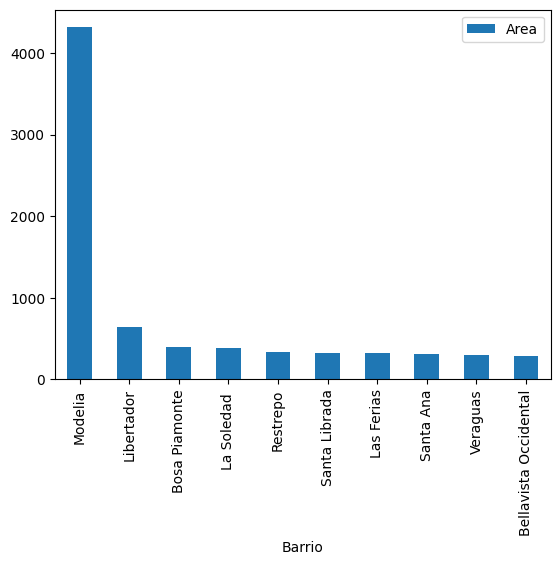

In [45]:
info_area.plot.bar()

In [68]:
estadisticas_adic = info_area.describe().to_dict()

In [69]:
# conteo, mediana, valores mínimo y máximo.
print(f"Conteo: {int(estadisticas_adic['Area']['count'])}, Mediana: {estadisticas_adic['Area']['50%']}, Val. Min: {estadisticas_adic['Area']['min']}, Val. Max: {estadisticas_adic['Area']['max']}")

Conteo: 10, Mediana: 332.25, Val. Min: 286.2, Val. Max: 4316.75
